In [7]:
import os
import cv2
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Ruta del directorio que contiene las imágenes
image_dir = "/home/squispeb/university/ML-Classification-p/images"

In [58]:
def extract_wavelet_features(image_path, mode='db1', level=2):
    """
    Extrae características de una imagen utilizando la transformada wavelet discreta (DWT).
    
    Parámetros:
    - image_path (str): Ruta de la imagen a procesar.
    - mode (str): Tipo de wavelet a usar (por defecto 'db1' que es Daubechies wavelet).
    - level (int): Nivel de descomposición de la DWT.
    
    Retorna:
    - features (np.array): Vector de características extraídas.
    """
    
    # Extraer la especie y el número de imagen del nombre del archivo
    filename = os.path.basename(image_path)
       
    try:
        print(f"filename: {filename}")
        species = filename[:3]
        image_num = filename[3:-4]
        species, image_num
        print(f"species: {species}", f"image_num: {image_num}")
    except ValueError:
        # Si el nombre del archivo no tiene el formato esperado, retornar None
        print(f"Error: no se pudieron extraer características de la imagen {filename}")
    
    # Leer la imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar DWT
    coeffs = pywt.wavedec2(img, mode, level=level)
    
    # Concatenar y normalizar los coeficientes para formar el vector de características
    features = np.concatenate([coeff.ravel() for coeff in coeffs], axis=0)
    
    features = (features - np.mean(features)) / np.std(features)

    # # Convertir los coeficientes a un arreglo de NumPy
    # coeff_ravel = np.array(coeffs).ravel()
    # coeffs_array = np.concatenate([coeff_ravel for coeff in coeffs], axis=0)

    # # Normalizar los coeficientes
    # coeffs_norm = (coeffs_array - np.mean(coeffs_array)) / np.std(coeffs_array)
    
    # # Aplanar el arreglo de coeficientes
    # features = coeffs_norm.ravel()
    
    return species, image_num, features

In [39]:
# Crear un diccionario para almacenar las características por especie
# species_features = {}

# filename = '0010001' + '.png'

# # Recorrer todos los archivos en el directorio de imágenes
# # for filename in os.listdir(image_dir):
# # Extraer las características de la imagen
# image_path = os.path.join(image_dir, filename)
# print(image_path)
# species, image_num, features = extract_wavelet_features(image_path, level=2)

# # Agregar las características al diccionario de especies
# if species not in species_features:
#     species_features[species] = []
# species_features[species].append((image_num, features))

/home/squispeb/university/ML-Classification-p/images/0010001.png


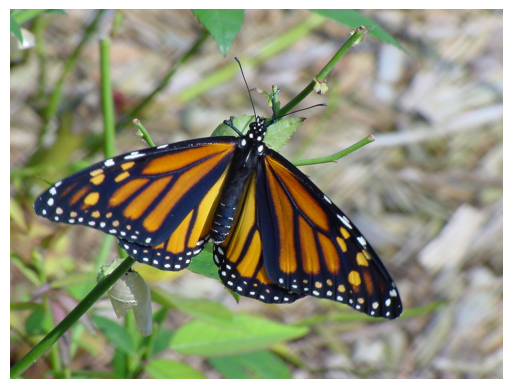

In [12]:
# Ruta del directorio que contiene las imágenes
filename = '0010001' + '.png'

# Extraer las características de la imagen
image_path = os.path.join(image_dir, filename)
print(image_path)

# Leer la imagen
img = cv2.imread(image_path)
# Convertir la imagen de BGR a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')
plt.show()

In [57]:
# Crear un diccionario para almacenar las características por especie
species_features = {}

filename = '0010001' + '.png'

# Recorrer todos los archivos en el directorio de imágenes
# for filename in os.listdir(image_dir):
# Extraer las características de la imagen
image_path = os.path.join(image_dir, filename)
print(image_path)
species, image_num, features = extract_wavelet_features(image_path, level=2)

# # Agregar las características al diccionario de especies
# if species not in species_features:
#     species_features[species] = []
# species_features[species].append((image_num, features))

/home/squispeb/university/ML-Classification-p/images/0010001.png
filename: 0010001.png
species: 001 image_num: 0001


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [54]:
# Crear un diccionario para almacenar las características por especie
species_features = {}

filename = '0010001' + '.png'

# Extraer las características de la imagen
image_path = os.path.join(image_dir, filename)
result = extract_wavelet_features(image_path, level=2)
if result is None:
    print(f"Error: no se pudieron extraer características de la imagen {filename}")
else:
    species, image_num, features = result
    
    # Agregar las características al diccionario de especies
    if species not in species_features:
        species_features[species] = []
    species_features[species].append((image_num, features))

filename: 0010001.png
species: 001 image_num: 0001


/home/squispeb/university/ML-Classification-p/venv/lib/python3.11/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [33]:
try:
    print(f"filename: {filename}")
    species = filename[:3]
    image_num = filename[3:-4]
    species, image_num
    print(f"species: {species}", f"image_num: {image_num}")
except ValueError:
    # Si el nombre del archivo no tiene el formato esperado, retornar None
    print(f"Error: no se pudieron extraer características de la imagen {filename}")
  

# print(filename)
# species = filename[:3]
# image_num = filename[3:-4]
# print(f"species: {species}")
# print(f"image_num: {image_num}")

filename: 0010001.png
species: 001 image_num: 0001
